In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [15]:
df = pd.read_csv('fake_job_postings.csv') 

print(df.shape)
df.head()


(5693, 18)


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0.0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0.0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0.0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0.0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0.0


In [16]:
df = df.dropna(subset=['description', 'title', 'company_profile', 'requirements', 'fraudulent'])


In [17]:
df['text'] = df['title'] + ' ' + df['company_profile'] + ' ' + df['description'] + ' ' + df['requirements']


In [18]:
df['fraudulent'] = df['fraudulent'].astype(int)


In [19]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
X = vectorizer.fit_transform(df['text'])
y = df['fraudulent']


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [22]:
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [23]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.975975975975976
Confusion Matrix:
 [[975   0]
 [ 24   0]]


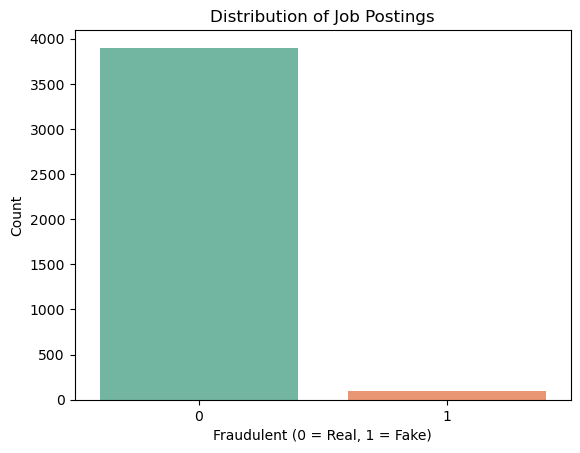

In [24]:
#Class Distribution (Fraudulent vs. Real Jobs)

sns.countplot(data=df, x='fraudulent', palette='Set2')
plt.title('Distribution of Job Postings')
plt.xlabel('Fraudulent (0 = Real, 1 = Fake)')
plt.ylabel('Count')
plt.show()

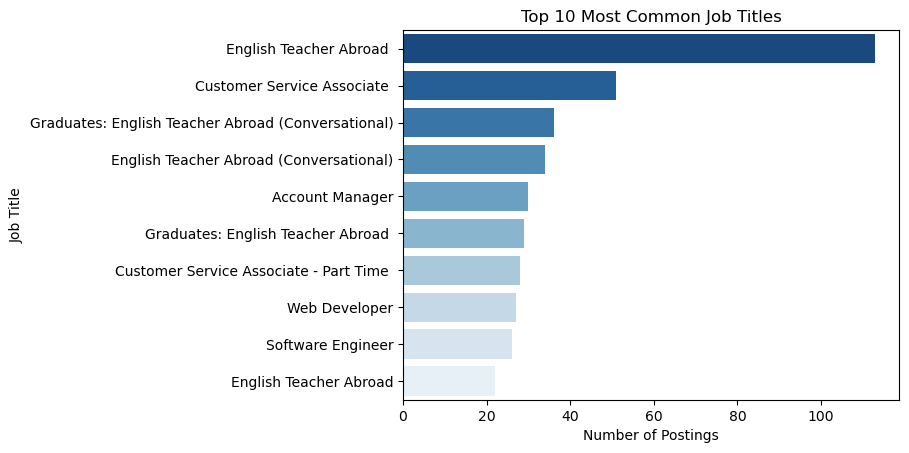

In [10]:
#Top 10 Most Common Job Titles
top_titles = df['title'].value_counts().nlargest(10)
sns.barplot(y=top_titles.index, x=top_titles.values, palette='Blues_r')
plt.title('Top 10 Most Common Job Titles')
plt.xlabel('Number of Postings')
plt.ylabel('Job Title')
plt.show()


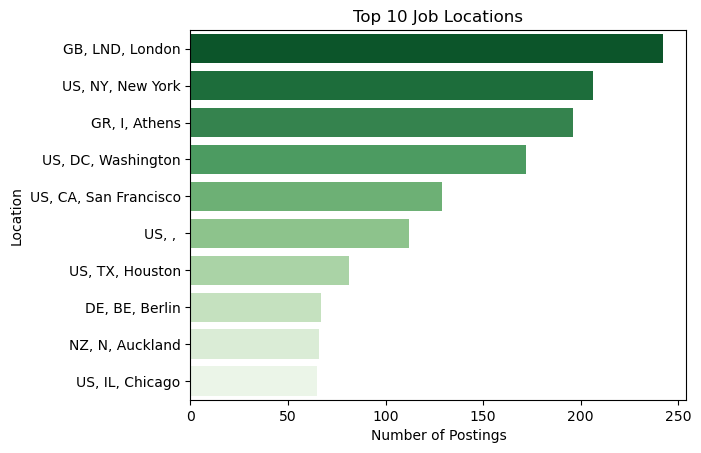

In [12]:
#Top 10 Most Frequent Locations
top_locations = df['location'].value_counts().nlargest(10)
sns.barplot(y=top_locations.index, x=top_locations.values, palette='Greens_r')
plt.title('Top 10 Job Locations')
plt.xlabel('Number of Postings')
plt.ylabel('Location')
plt.show()


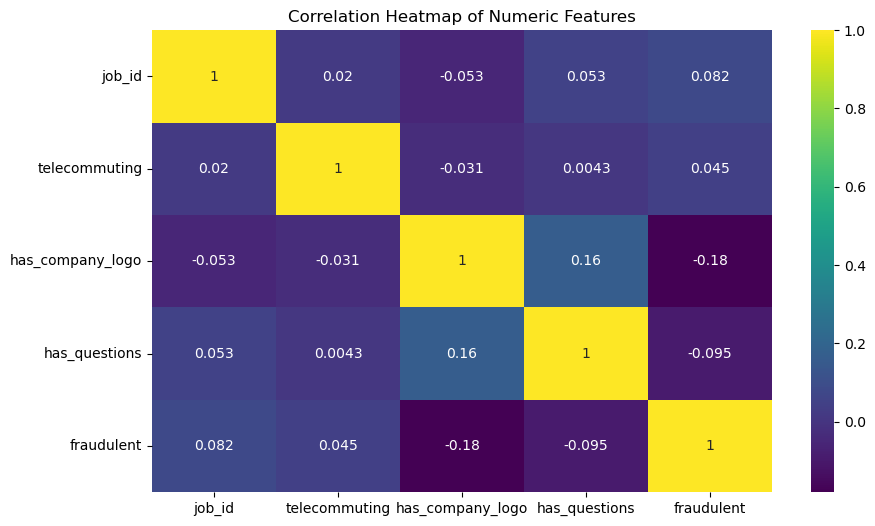

In [13]:
#
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()
